In [2]:
import numpy as np
from scipy.spatial.distance import hamming
import cv2
import matplotlib.pyplot as plt

In [9]:
def plot(img1, img2, keys1, keys2, matches_data):
    
    fig, ax = plt.subplots(figsize=(20, 20))
    
    new_img = cv2.cvtColor(cv2.drawMatches(
        img1,
        keys1, 
        img2, 
        keys2, 
        matches_data[:30], 
        None, 
        flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS), cv2.COLOR_BGR2RGB)
    
    plt.imshow(new_img)
    plt.show()

In [4]:
def orb(img1, img2):
    orb = cv2.ORB_create()
    keys1, desc1 = orb.detectAndCompute(img1, None)
    keys2, desc2 = orb.detectAndCompute(img2, None)

    return keys1, keys2, desc1, desc2

In [5]:
def cv_match(img1, img2):
    keys1, keys2, desc1, desc2 = orb(img1, img2)
    match = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True).match(desc1, desc2)
    match = sorted(match, key = lambda x: x.distance)

    return img1, img2, keys1, keys2, match

In [6]:
def custom_match(img1, img2):

    keys1, keys2, desc1, desc2 = orb(img1, img2)

    match = []
    for i, k1 in enumerate(desc1):
        for j, k2 in enumerate(desc2):
            match.append(cv2.DMatch(_distance = hamming(k1, k2) * len(k1), _imgIdx = 0, _queryIdx = i, _trainIdx = j))
    
    match = sorted(match, key = lambda x: x.distance)

    return img1, img2, keys1, keys2, match

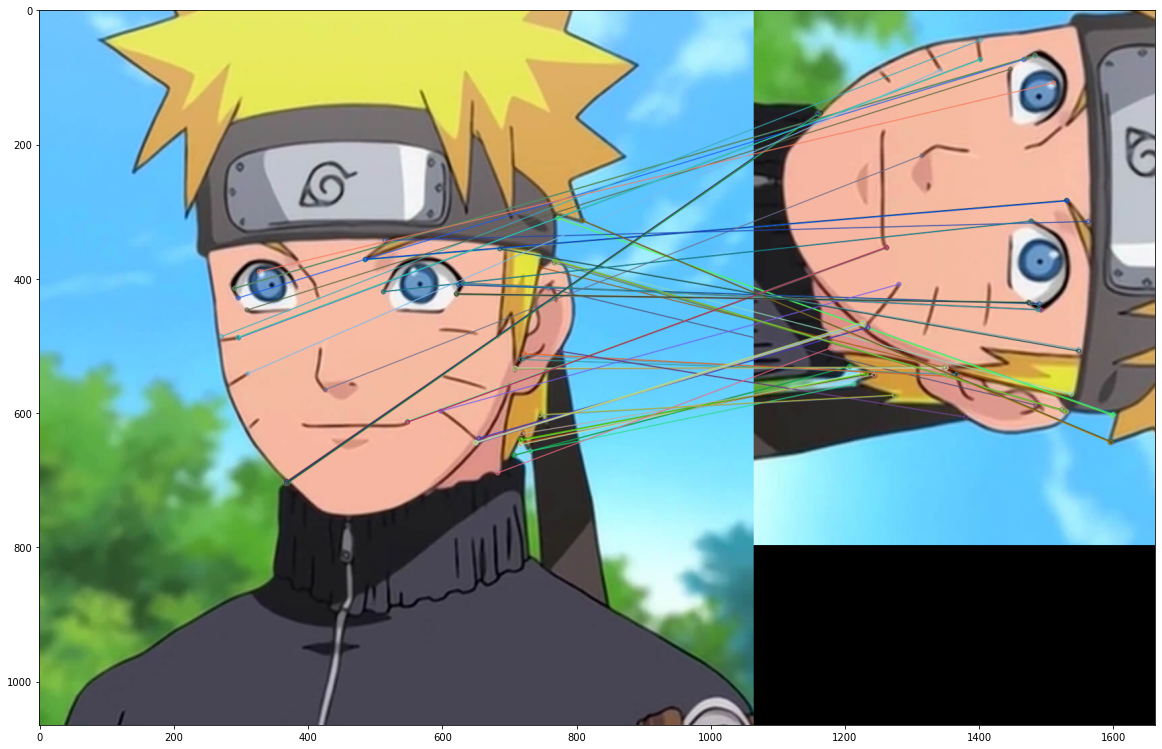

In [ ]:
img1, img2, keys1, keys2, match = custom_match(cv2.imread('naruto 1.jpg'), cv2.imread('naruto 2.jpg'))
plot(img1, img2, keys1, keys2, match)

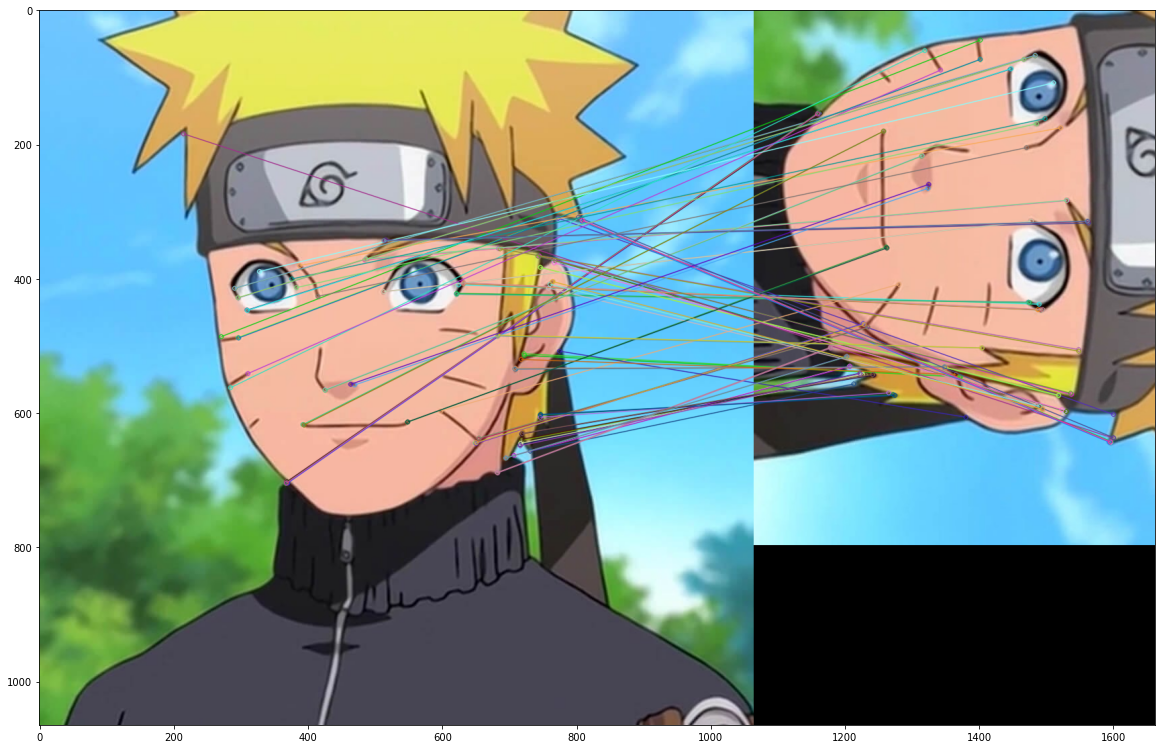

In [ ]:
img1, img2, keys1, keys2, match = cv_match(cv2.imread('naruto 1.jpg'), cv2.imread('naruto 2.jpg'))
plot(img1, img2, keys1, keys2, match)

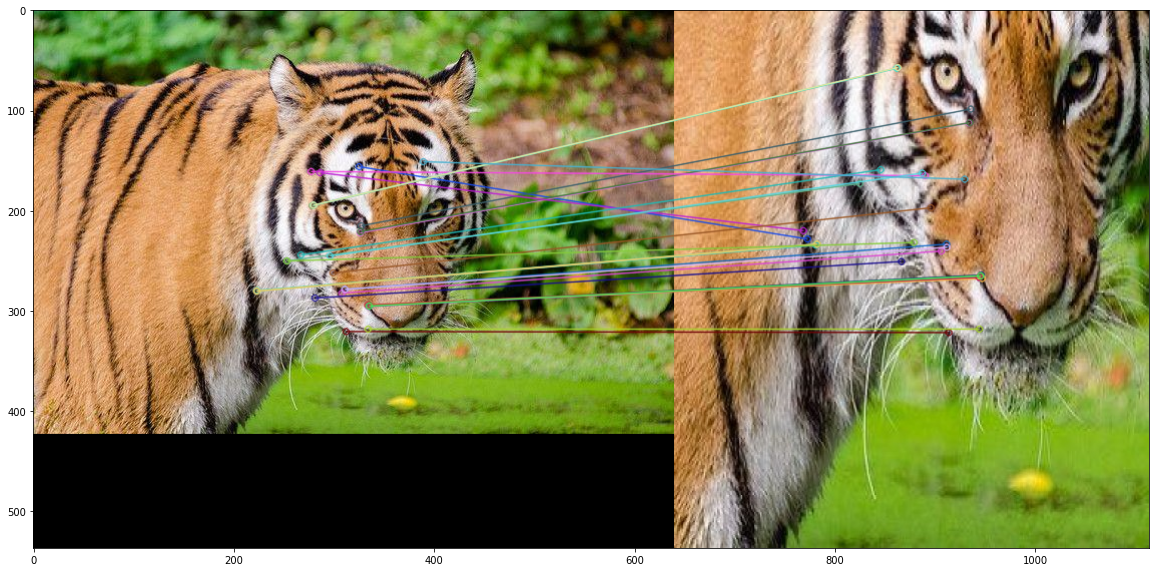

In [10]:
img1, img2, keys1, keys2, match = custom_match(cv2.imread('tiger-1.jpg'), cv2.imread('tiger-2.jpg'))
plot(img1, img2, keys1, keys2, match)

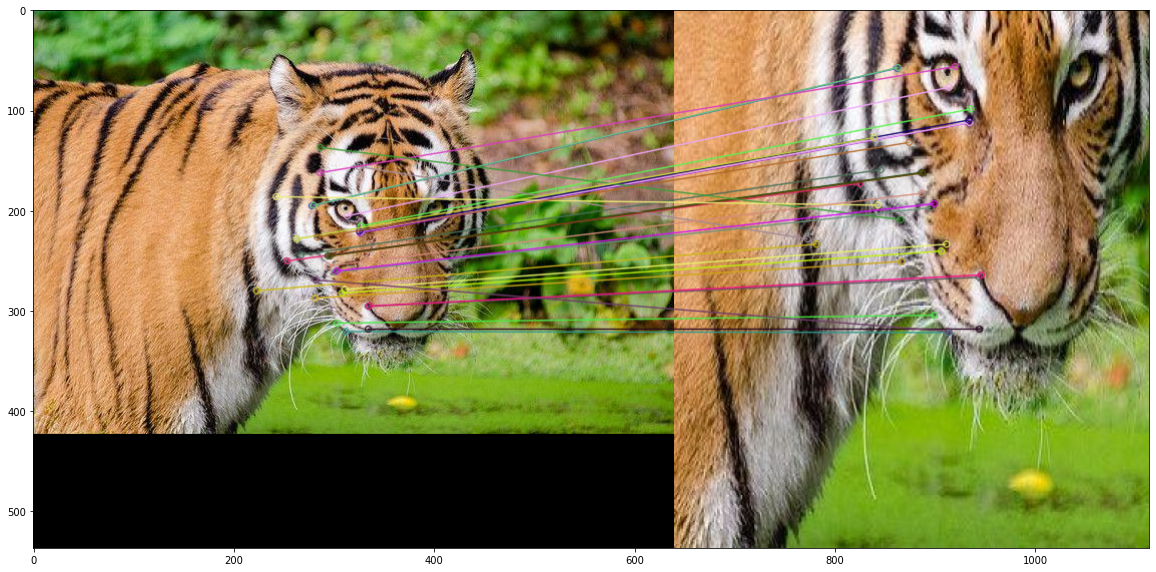

In [11]:
img1, img2, keys1, keys2, match = cv_match(cv2.imread('tiger-1.jpg'), cv2.imread('tiger-2.jpg'))
plot(img1, img2, keys1, keys2, match)